# Imports

In [1]:
import tensorflow as tf
import logging
# only log errors
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

import numpy as np

# Get the Data

In [2]:
freq_q = np.array([0,0,1,1.1,1.2,1.3,1.5,1.7,1.8,2,2.1,2.25,2.3,2.4,2.5,2.75,2.75,2.8,2.85,2.9,3,3.1,3.2,3.25,3.4,3.55,3.6,3.7,3.75,3.8,3.95], dtype=float)
voltage_a = np.array([2,2.2,2.4,2.6,2.8,3,3.2,3.4,3.6,3.8,4,4.2,4.4,4.6,4.8,5,5.2,5.4,5.6,5.8,6,6.2,6.4,6.6,6.8,7,7.2,7.4,7.6,7.8,8], dtype=float)

for i, c in enumerate(freq_q):
  print("{} Hz Frequency = {} Volt Voltage".format(c, voltage_a[i]))

0.0 Hz Frequency = 2.0 Volt Voltage
0.0 Hz Frequency = 2.2 Volt Voltage
1.0 Hz Frequency = 2.4 Volt Voltage
1.1 Hz Frequency = 2.6 Volt Voltage
1.2 Hz Frequency = 2.8 Volt Voltage
1.3 Hz Frequency = 3.0 Volt Voltage
1.5 Hz Frequency = 3.2 Volt Voltage
1.7 Hz Frequency = 3.4 Volt Voltage
1.8 Hz Frequency = 3.6 Volt Voltage
2.0 Hz Frequency = 3.8 Volt Voltage
2.1 Hz Frequency = 4.0 Volt Voltage
2.25 Hz Frequency = 4.2 Volt Voltage
2.3 Hz Frequency = 4.4 Volt Voltage
2.4 Hz Frequency = 4.6 Volt Voltage
2.5 Hz Frequency = 4.8 Volt Voltage
2.75 Hz Frequency = 5.0 Volt Voltage
2.75 Hz Frequency = 5.2 Volt Voltage
2.8 Hz Frequency = 5.4 Volt Voltage
2.85 Hz Frequency = 5.6 Volt Voltage
2.9 Hz Frequency = 5.8 Volt Voltage
3.0 Hz Frequency = 6.0 Volt Voltage
3.1 Hz Frequency = 6.2 Volt Voltage
3.2 Hz Frequency = 6.4 Volt Voltage
3.25 Hz Frequency = 6.6 Volt Voltage
3.4 Hz Frequency = 6.8 Volt Voltage
3.55 Hz Frequency = 7.0 Volt Voltage
3.6 Hz Frequency = 7.2 Volt Voltage
3.7 Hz Frequency = 7.4

# Create and Pre-Train the Model

In [3]:
#units --> number of neurons in the layer. Determines the shape of the output vector.
#          Defines how many internal variables the layer has to learn to solve the problem.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=64, input_shape=[1,], activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [4]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10 ** (epoch / 25)
)

model.compile(
    loss =tf.keras.losses.Huber(),
    optimizer = tf.keras.optimizers.Adam(learning_rate= 1e-5),
    metrics=[tf.keras.metrics.MeanAbsolutePercentageError()]
)

In [5]:
tf.keras.backend.clear_session()
history = model.fit(freq_q, voltage_a, epochs=100, callbacks = [lr_schedule], verbose=True, shuffle=True)
print("Pre-Traning completed successfully")
model.summary()

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 4.5467 - mean_absolute_percentage_error: 100.8906 - lr: 1.0000e-05
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 4.5455 - mean_absolute_percentage_error: 100.8688 - lr: 1.0965e-05
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 4.5443 - mean_absolute_percentage_error: 100.8447 - lr: 1.2023e-05
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 4.5429 - mean_absolute_percentage_error: 100.8182 - lr: 1.3183e-05
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 4.5414 - mean_absolute_percentage_error: 100.7892 - lr: 1.4454e-05
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 4.5398 - mean_absolute_percentage_error: 100.7574 - lr: 1.5849e-05
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 4.5380 - mean_absolute_percentage_error: 100.7225 - lr: 1.7378e-05
Epoch 8/100
1/1 [==============

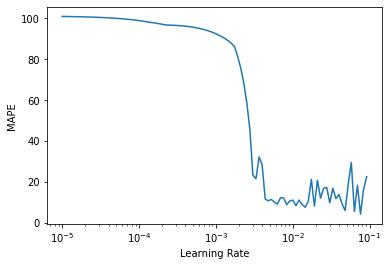

In [6]:
import matplotlib.pyplot as plt
plt.xlabel("Learning Rate")
plt.ylabel("MAPE") #Lower MAPE value better the model performs
plt.semilogx(history.history["lr"], history.history["mean_absolute_percentage_error"])

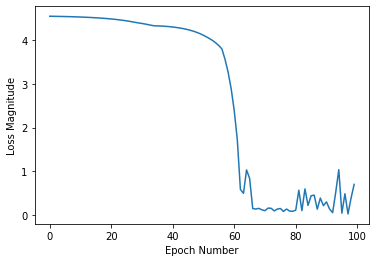

In [7]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

# Re-create model based on optimized values from pre-training

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=64, input_shape=[1,], activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0759),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])

In [11]:
tf.keras.backend.clear_session()
history = model.fit(freq_q, voltage_a, epochs=62, verbose=True, shuffle=False)
print("Traning completed successfully")

Epoch 1/62
1/1 [==============================] - 1s 593ms/step - loss: 27.6337 - mean_absolute_percentage_error: 99.0561
Epoch 2/62
1/1 [==============================] - 0s 18ms/step - loss: 153.7469 - mean_absolute_percentage_error: 222.6185
Epoch 3/62
1/1 [==============================] - 0s 23ms/step - loss: 3.6498 - mean_absolute_percentage_error: 37.9070
Epoch 4/62
1/1 [==============================] - 0s 19ms/step - loss: 1.9413 - mean_absolute_percentage_error: 27.7894
Epoch 5/62
1/1 [==============================] - 0s 10ms/step - loss: 9.4638 - mean_absolute_percentage_error: 58.5845
Epoch 6/62
1/1 [==============================] - 0s 18ms/step - loss: 4.0764 - mean_absolute_percentage_error: 40.1405
Epoch 7/62
1/1 [==============================] - 0s 12ms/step - loss: 8.2470 - mean_absolute_percentage_error: 56.0384
Epoch 8/62
1/1 [==============================] - 0s 18ms/step - loss: 5.8863 - mean_absolute_percentage_error: 48.1791
Epoch 9/62
1/1 [===================

# Evaluate Model Results

In [21]:
print(model.evaluate(freq_q, voltage_a))

1/1 [==============================] - 0s 22ms/step - loss: 0.1010 - mean_absolute_percentage_error: 6.3627
[0.10102028399705887, 6.362700939178467]


In [13]:
model.save("Best_Yet")